# Stationary Equilibrium

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
  - 3.1. [Direct approach](#toc3_1_)    
  - 3.2. [Indirect approach](#toc3_2_)    
  - 3.3. [Finding beta approach](#toc3_3_)    
  - 3.4. [Looking at the stationary equilibrium](#toc3_4_)    
    - 3.4.1. [Policy functions](#toc3_4_1_)    
    - 3.4.2. [Distributions](#toc3_4_2_)    
- 4. [Aggregate savings and the interest rate](#toc4_)    
- 5. [Idiosyncratic risk and the steady state interest rate](#toc5_)    
- 6. [Calibration](#toc6_)    
- 7. [Extra: Demand vs. supply of capital](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Contents:**

1. Introduces the `GEModelTools`
1. Solves and simulates a simple **Heterogenous Agent Neo-Classical (HANC) model**

In [2]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [3]:
model = HANCModelClass(name='baseline') # create an instance of the model

In [4]:
par = model.par
ss = model.ss

**Pause:** Take a look at `.par` and `.ss`

**Question I:** Where does the variable names in `.ss` come from?

**Question II:** What explains the shapes below?

In [5]:
print(ss.a.shape)
print(ss.D.shape)
print(ss.z_trans.shape)

(1, 7, 500)
(1, 7, 500)
(1, 7, 7)


## 2. <a id='toc2_'></a>[Solve household problem](#toc0_)

Set the steady state values, which matter for the household:

In [6]:
ss.r = 0.05 / 4
ss.w = 2/3

**Solve the household problem** with `.solve_hh_ss()`:
    
1. Calls `.prepare_hh_ss()`
1. Calls `.solve_backwards_hh()` until convergence

In [7]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [1040 iterations]


In [8]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.7 secs [1132 iterations]


**Aggregate savings:**

In [9]:
np.sum(ss.a*ss.D)

16.00000000000021

## 3. <a id='toc3_'></a>[Find stationary equilibrium](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Direct approach](#toc0_)

In [10]:
model.find_ss(method='direct',do_print=True, K_min=10.0, K_max = 18.5)

### step 1: broad search ###

guess ss.K = 10.0000
implied ss.r = 0.0202
implied ss.w = 0.5700
household problem in ss solved in 0.1 secs [1271 iterations]
household problem in ss simulated in 0.4 secs [15879 iterations]
implied ss.A_hh = 10008.0859
clearing_A = -9998.08589371

guess ss.K = 10.9444
implied ss.r = 0.0185
implied ss.w = 0.5874
household problem in ss solved in 0.1 secs [1270 iterations]
household problem in ss simulated in 0.3 secs [9422 iterations]
implied ss.A_hh = 69.3059
clearing_A = -58.36147224

guess ss.K = 11.8889
implied ss.r = 0.0171
implied ss.w = 0.6038
household problem in ss solved in 0.1 secs [1268 iterations]
household problem in ss simulated in 0.1 secs [3356 iterations]
implied ss.A_hh = 34.6526
clearing_A = -22.76368409

guess ss.K = 12.8333
implied ss.r = 0.0158
implied ss.w = 0.6194
household problem in ss solved in 0.1 secs [1254 iterations]
household problem in ss simulated in 0.1 secs [2112 iterations]
implied ss.A_hh = 25.3074
clearing_A = -12.47

**Look at the steady state variables:**

In [11]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')
    

Gamma          : 0.3969
K              : 16.0000
L              : 1.0000
rK             : 0.0208
w              : 0.6667
Y              : 1.0000
A              : 16.0000
r              : 0.0125
A_hh           : 16.0000
C_hh           : 0.8667
L_hh           : nan
I              : 0.1333
clearing_A     : 0.0000
clearing_L     : nan
clearing_Y     : 0.0000


In [12]:
model.info(ss=True)

settings:
 par.py_hh = True
 par.py_blocks = True
 par.full_z_trans = False
 par.warnings = True
 par.T = 500

households:
 grids_hh: [a]
 pols_hh: [a]
 inputs_hh: [r,w]
 inputs_hh_z: []
 outputs_hh: [a,c]
 intertemps_hh: [vbeg_a]

aggregate:
 shocks: []
 unknowns: []
 targets: []

blocks (inputs -> outputs):
 production_firm: [] -> [Gamma=0.40,K=16.00,L=1.00,rK=0.02,w=0.67,Y=1.00]
 mutual_fund: [K=16.00,rK=0.02] -> [A=16.00,r=0.01]
 hh: [r=0.01,w=0.67] -> [A_hh=16.00,C_hh=0.87]
 market_clearing: [A=16.00,A_hh=16.00,L=1.00,Y=1.00,C_hh=0.87,K=16.00] -> [L_hh=nan,I=0.13,clearing_A=0.00,clearing_L=nan,clearing_Y=0.00]


### 3.2. <a id='toc3_2_'></a>[Indirect approach](#toc0_)

In [13]:
model.find_ss(method='indirect',do_print=True)

household problem in ss solved in 0.1 secs [1040 iterations]
household problem in ss simulated in 0.0 secs [1132 iterations]

Implied K = 16.000
Implied Y =  1.000
Implied Gamma =  0.397
Implied delta =  0.008
Implied K/Y = 16.000
Discrepancy in K-A_hh =   0.00000000
Discrepancy in Y-L_hh-I =   0.00000000

found steady state in 0.1 secs


### 3.3. <a id='toc3_3_'></a>[Finding beta approach](#toc0_)

In [14]:
model.find_ss(method='beta', do_print=True, beta_min = 0.5, beta_max = 0.99)
print(model.par.beta)

  0: beta =   0.50078213 -> A-A_hh =  16.00000000
  1: beta =   0.74539107 -> A-A_hh =  15.96773642
  2: beta =   0.86769553 -> A-A_hh =  15.54523462
  3: beta =   0.92884777 -> A-A_hh =  14.27425784
  4: beta =   0.95942388 -> A-A_hh =  11.66589940
  5: beta =   0.97471194 -> A-A_hh =   6.79683221
  6: beta =   0.98235597 -> A-A_hh =  -3.06295685
  7: beta =   0.97998134 -> A-A_hh =   1.75351115
  8: beta =   0.98084586 -> A-A_hh =   0.32932528
  9: beta =   0.98102637 -> A-A_hh =  -0.00700843
 10: beta =   0.98102260 -> A-A_hh =   0.00015663
 11: beta =   0.98102269 -> A-A_hh =   0.00000007
 12: beta =   0.98102269 -> A-A_hh =  -0.00000000
 13: beta =   0.98102269 -> A-A_hh =   0.00000000

beta =   0.98102269 [A-A_hh =  -0.00000000]

Implied K = 16.000
Implied Y =  1.000
Implied Gamma =  0.397
Implied delta =  0.008
Implied K/Y = 16.000
Discrepancy in K-A_hh =  -0.00000000
Discrepancy in Y-L_hh-I =   0.00000000

found steady state in 1.8 secs
0.9810226868872732


**Question:** What are the pros and cons of those three methods?

In [15]:
model.info(ss=True)

settings:
 par.py_hh = True
 par.py_blocks = True
 par.full_z_trans = False
 par.warnings = True
 par.T = 500

households:
 grids_hh: [a]
 pols_hh: [a]
 inputs_hh: [r,w]
 inputs_hh_z: []
 outputs_hh: [a,c]
 intertemps_hh: [vbeg_a]

aggregate:
 shocks: []
 unknowns: []
 targets: []

blocks (inputs -> outputs):
 production_firm: [] -> [Gamma=0.40,K=16.00,L=1.00,rK=0.02,w=0.67,Y=1.00]
 mutual_fund: [K=16.00,rK=0.02] -> [A=16.00,r=0.01]
 hh: [r=0.01,w=0.67] -> [A_hh=16.00,C_hh=0.87]
 market_clearing: [A=16.00,A_hh=16.00,L=1.00,Y=1.00,C_hh=0.87,K=16.00] -> [L_hh=nan,I=0.13,clearing_A=-0.00,clearing_L=nan,clearing_Y=0.00]


### 3.4. <a id='toc3_4_'></a>[Looking at the stationary equilibrium](#toc0_)

#### 3.4.1. <a id='toc3_4_1_'></a>[Policy functions](#toc0_)

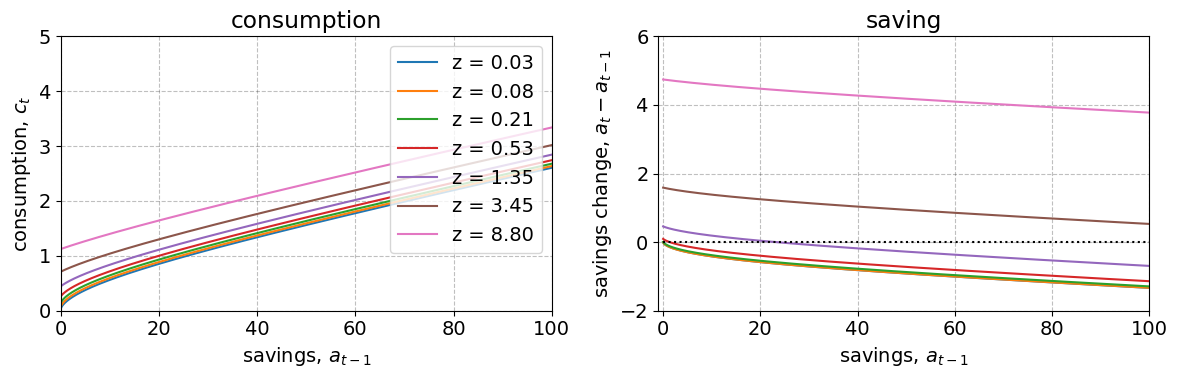

In [16]:
fig = plt.figure(figsize=(12,4),dpi=100)

I = par.a_grid < 500

# a. consumption
ax = fig.add_subplot(1,2,1)
ax.set_title(f'consumption')

for i_z,z in enumerate(par.z_grid):
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'z = {z:.2f}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')
ax.set_xlim(0,100)
ax.set_ylim(0,5)

# b. saving
ax = fig.add_subplot(1,2,2)
ax.set_title(f'saving')

for i_z,z in enumerate(par.z_grid):
    ax.plot(par.a_grid[I],ss.a[0,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')

ax.plot(np.zeros_like(par.a_grid), color = 'black', linestyle = ':')
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
ax.set_xlim(-1,100)
ax.set_ylim(-2.0,6.0)

fig.tight_layout()
fig.savefig(f'figs/c_func.pdf')

#### 3.4.2. <a id='toc3_4_2_'></a>[Distributions](#toc0_)

In [18]:
ss.D.shape 

(1, 7, 500)

/var/folders/hn/dsqvtr1n09z9k135wwh_g7280000gn/T/ipykernel_11486/596393570.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


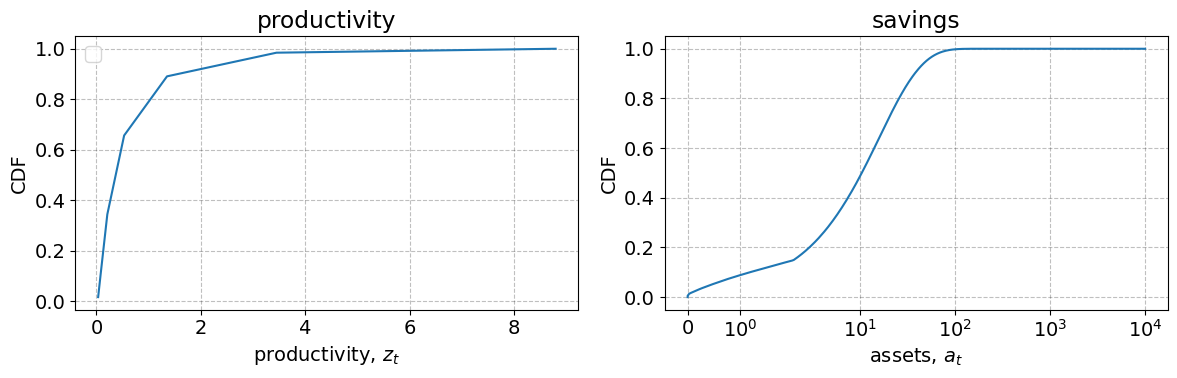

In [19]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

ax.plot(par.z_grid,np.cumsum(np.sum(ss.D[0],axis=1)))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')
ax.legend()

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')

ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0))
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

fig.tight_layout()
fig.savefig('figs/distribution.pdf')

**Income moments:**

In [ ]:
mean_z = np.sum(ss.D*par.z_grid[:,np.newaxis])
std_z = np.sqrt(np.sum(ss.D*(par.z_grid[np.newaxis,:,np.newaxis]-mean_z)**2))
print(f'mean z: {mean_z:5.2f}')
print(f'std. z: {std_z:5.2f}')

mean z:  1.00
std. z:  1.36


**Asset moments:**

In [ ]:
# a. prepare
Da = np.sum(ss.D,axis=(0,1))


def get_share(D=None, a_grid=None, perc_bottom=0.0, perc_top=1.0):

    cdf = D.cumsum()
    wealth_cdf = (a_grid * D).cumsum()
    tot_wealth = (a_grid * D).sum()

    if perc_bottom == 0.0:
        wealth_bottom = 0.0
    else:
        wealth_bottom = np.interp(perc_bottom, cdf, wealth_cdf)

    if perc_top == 1.0:
        wealth_top = tot_wealth         
    else:
        wealth_top = np.interp(perc_top, cdf, wealth_cdf)
    
    wealth = wealth_top - wealth_bottom
    share = wealth / tot_wealth

    return share

b50 = get_share(D=Da, a_grid=par.a_grid, perc_bottom=0.0, perc_top=0.5) 
n40 = get_share(D=Da, a_grid=par.a_grid, perc_bottom=0.5, perc_top=0.9)
top10 = get_share(D=Da, a_grid=par.a_grid, perc_bottom=0.9, perc_top=1.0)
top100 = get_share(D=Da, a_grid=par.a_grid, perc_bottom=0.99, perc_top=1.0)
top1000 = get_share(D=Da, a_grid=par.a_grid, perc_bottom=0.999, perc_top=1.0)
top10000 = get_share(D=Da, a_grid=par.a_grid, perc_bottom=0.9999, perc_top=1.0)

wealth_shares = np.array([b50, n40, top10, top100, top1000, top10000]) * 100

In [ ]:
import pandas as pd
df = pd.read_csv(
    '../wealth_psz.csv')
df = df[df['Year'] == 2019]

# Round 'value' column, convert to integer and drop 'Year' column

df['value'] = df['value'] * 100
df = df.drop(columns='Year')

# Add 'Model' column with wealth shares, round and convert to integer
df['Model'] = wealth_shares

# Rename 'value' column to 'Data PSZ'
df = df.rename(columns={'value': 'Data PSZ'})

# Pivot the DataFrame and reorder columns
df = pd.pivot_table(df, columns='Quantile', values=['Data PSZ', 'Model'])
df = df[['Bottom 50%', 'Middle 40%', 'Top 10%',
            'Top 1%', 'Top 0.1%', 'Top 0.01%']]

print(df.round(0))


Quantile  Bottom 50%  Middle 40%  Top 10%  Top 1%  Top 0.1%  Top 0.01%
Data PSZ         0.0        28.0     71.0    35.0      18.0        9.0
Model           14.0        52.0     35.0     6.0       1.0        0.0


We completely underestime the amount of wealth inequality observed in the US!

**MPC:**

In [ ]:
def calc_MPC(par,ss):
    
    MPC = np.zeros(ss.D.shape)
    dc = (ss.c[:,:,1:]-ss.c[:,:,:-1])
    dm = (1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,1:]-(1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,:-1]
    MPC[:,:,:-1] = dc/dm
    MPC[:,:,-1] = MPC[:,:,-1] # assuming constant MPC at end
    
    return MPC 

MPC = calc_MPC(par,ss)

mean_MPC = np.sum(MPC*ss.D)
print(f'mean MPC: {mean_MPC:.3f}')

mean MPC: 0.044


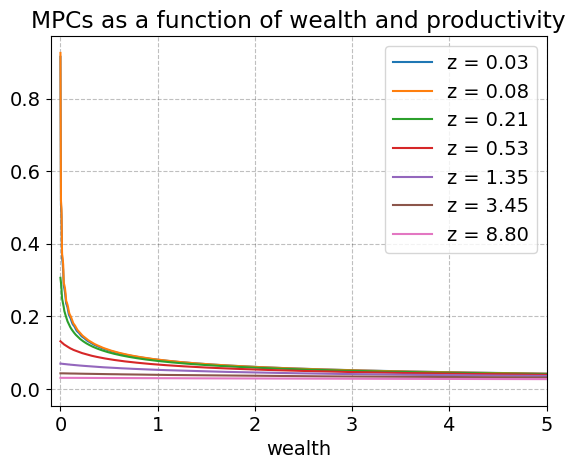

In [ ]:
plt.plot(par.a_grid, MPC[0].T)
plt.xlim(-0.1, 5.0)
plt.legend([f'z = {z:.2f}' for z in par.z_grid])
plt.title('MPCs as a function of wealth and productivity')
plt.xlabel('wealth')
plt.show()

**Question:** What is the correlation between income and savings?

## 4. <a id='toc4_'></a>[Aggregate savings and the interest rate](#toc0_)

In [ ]:
# allocate
Nr_ss = 10
r_ss_min = 0.04 / 4
r_ss_max = 0.065 / 4
r_ss_vec = np.linspace(r_ss_min,r_ss_max,Nr_ss)

K_hh_supply = np.zeros(Nr_ss)
K_firm_demand = np.zeros(Nr_ss)

# calculate
for i,r_ss in enumerate(r_ss_vec):
    
    print(f'{r_ss = :7.4f}')
          
    model_ = model.copy()
    model_.ss.r = r_ss
    
    # a. firms
    K_firm_demand[i] = ((r_ss+par.delta)/(par.alpha*ss.Gamma))**(1/(par.alpha-1))
    print(f'K_firm_demand = {K_firm_demand[i]:7.4f}')
    
    w_ss = model_.ss.w = (1.0-par.alpha)*ss.Gamma*(K_firm_demand[i]/ss.L)**par.alpha

    print(f'{w_ss = :7.4f}')

    # b. households
    model_.solve_hh_ss(do_print=True)
    model_.simulate_hh_ss(do_print=True)
    
    K_hh_supply[i] = np.sum(model_.ss.a*model_.ss.D)
    print(f'K_hh_supply = {K_hh_supply[i]:7.4f}')
          
    # c. clearing
    clearing_A = K_hh_supply[i]-K_firm_demand[i]
    print(f'{clearing_A = :7.4f}\n')


r_ss =  0.0100
K_firm_demand = 19.3819
w_ss =  0.7107
household problem in ss solved in 0.1 secs [885 iterations]
household problem in ss simulated in 0.0 secs [849 iterations]
K_hh_supply = 13.1173
clearing_A = -6.2646

r_ss =  0.0107
K_firm_demand = 18.3306
w_ss =  0.6976
household problem in ss solved in 0.1 secs [924 iterations]
household problem in ss simulated in 0.0 secs [911 iterations]
K_hh_supply = 13.7526
clearing_A = -4.5779

r_ss =  0.0114
K_firm_demand = 17.3710
w_ss =  0.6852
household problem in ss solved in 0.1 secs [966 iterations]
household problem in ss simulated in 0.0 secs [984 iterations]
K_hh_supply = 14.4996
clearing_A = -2.8714

r_ss =  0.0121
K_firm_demand = 16.4923
w_ss =  0.6734
household problem in ss solved in 0.1 secs [1011 iterations]
household problem in ss simulated in 0.0 secs [1071 iterations]
K_hh_supply = 15.3859
clearing_A = -1.1064

r_ss =  0.0128
K_firm_demand = 15.6853
w_ss =  0.6623
household problem in ss solved in 0.1 secs [1060 iterations]

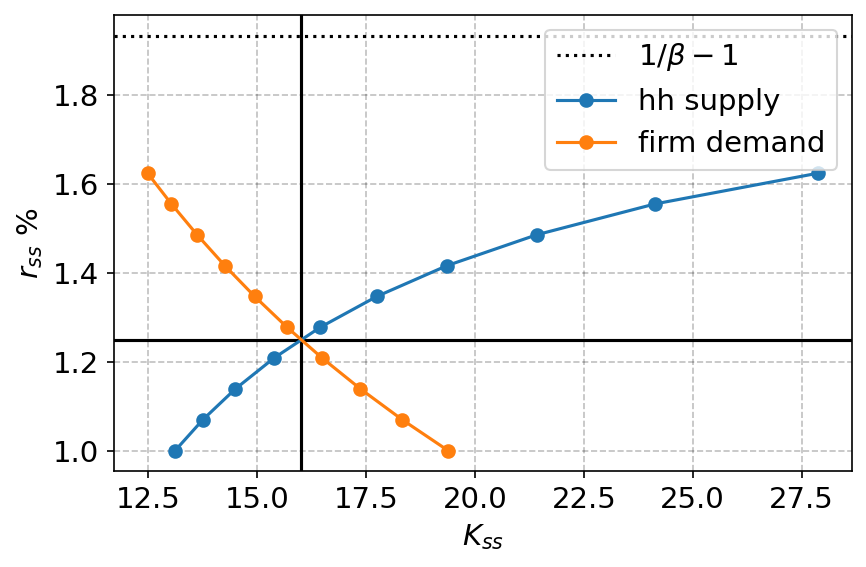

In [ ]:
fig = plt.figure(figsize=(6,6/1.5),dpi=150)
ax = fig.add_subplot(1,1,1)

ax.axhline(ss.r*100,color='black')
ax.axhline((1/model.par.beta-1)*100,color='black', linestyle = ':', label = '$1/\\beta - 1$')
ax.axvline(ss.K,color='black')

ax.plot(K_hh_supply,r_ss_vec * 100,'-o',label='hh supply')
ax.plot(K_firm_demand,r_ss_vec*100,'-o',label='firm demand')

ax.set_ylabel('$r_{ss}$ %')
ax.set_xlabel('$K_{ss}$')
ax.legend(frameon=True)
plt.tight_layout()   
plt.savefig('figs/market_clearing.pdf')

## 5. <a id='toc5_'></a>[Idiosyncratic risk and the steady state interest rate](#toc0_)

In [ ]:
print(f'ss.A_hh = ss.K = {ss.A_hh:.2f}')
print(f'ss.r = {ss.r*100:.2f} %')
print('')

N_psi = 10
psi_vec = np.linspace(0.5*par.sigma_psi,1.5*par.sigma_psi,N_psi)
A_pe_vec = np.zeros((N_psi))
A_ge_vec = np.zeros((N_psi))


for i, sigma_psi in enumerate(psi_vec):
    
    print(f'{sigma_psi = :.2f}')

    model_ = model.copy()
    model_.par.sigma_psi = sigma_psi
        
    model_.ss.r = model.ss.r 
    model_.ss.w = model.ss.w
    model_.solve_hh_ss(do_print=False)
    model_.simulate_hh_ss(do_print=False)
    
    A_pe_vec[i] = np.sum(model_.ss.a*model_.ss.D)
    
    print(f'PE {A_pe_vec[i] = :.2f}')
          
    model_.find_ss(method='direct', K_min = 1.0, K_max = 30.0)

    A_ge_vec[i] = model_.ss.A_hh

    print(f'GE ss.r = {model_.ss.r*100:.2f} %')
    print(f'GE ss.A_hh = ss.K = {model_.ss.A_hh:.2f}')

    print('')



ss.A_hh = ss.K = 16.00
ss.r = 1.25 %

sigma_psi = 0.25
PE A_pe_vec[i] = 4.92
GE ss.r = 1.71 %
GE ss.A_hh = ss.K = 11.87

sigma_psi = 0.31
PE A_pe_vec[i] = 7.12
GE ss.r = 1.61 %
GE ss.A_hh = ss.K = 12.58

sigma_psi = 0.36
PE A_pe_vec[i] = 9.52
GE ss.r = 1.51 %
GE ss.A_hh = ss.K = 13.43

sigma_psi = 0.42
PE A_pe_vec[i] = 12.05
GE ss.r = 1.40 %
GE ss.A_hh = ss.K = 14.39

sigma_psi = 0.47
PE A_pe_vec[i] = 14.67
GE ss.r = 1.30 %
GE ss.A_hh = ss.K = 15.44

sigma_psi = 0.53
PE A_pe_vec[i] = 17.34
GE ss.r = 1.20 %
GE ss.A_hh = ss.K = 16.57

sigma_psi = 0.58
PE A_pe_vec[i] = 20.01
GE ss.r = 1.11 %
GE ss.A_hh = ss.K = 17.76

sigma_psi = 0.64
PE A_pe_vec[i] = 22.69
GE ss.r = 1.02 %
GE ss.A_hh = ss.K = 18.99

sigma_psi = 0.69
PE A_pe_vec[i] = 25.33
GE ss.r = 0.95 %
GE ss.A_hh = ss.K = 20.24

sigma_psi = 0.75
PE A_pe_vec[i] = 27.93
GE ss.r = 0.88 %
GE ss.A_hh = ss.K = 21.50



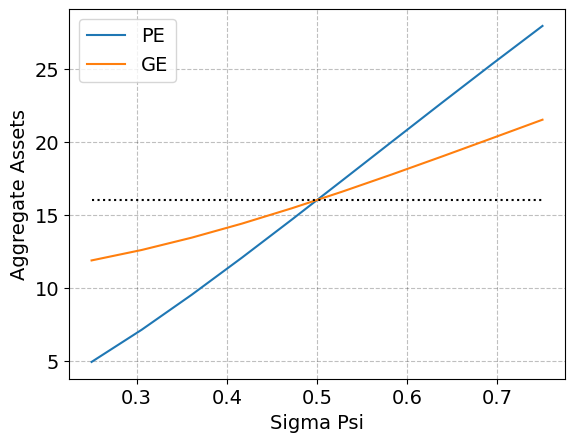

In [ ]:
plt.plot(psi_vec, A_pe_vec)
plt.plot(psi_vec, A_ge_vec)
plt.plot(psi_vec, np.ones_like(A_ge_vec) * model.ss.K, color = 'black', linestyle = ':')
plt.xlabel('Sigma Psi')
plt.ylabel('Aggregate Assets')
plt.legend(['PE', 'GE'])
plt.savefig('figs/sigma_psi_vs_A.pdf')
plt.show()

## 6. <a id='toc6_'></a>[Matching the average MPC](#toc0_)

Choose `beta_mean` to get chosen average MPC.

In [ ]:
K_vec = np.linspace(0.5, 18.0, 10)
MPC_vec = np.zeros_like(K_vec)

model_K = model.copy()
for i, K in enumerate(K_vec):
    model_K.par.K_ss_target = K
    model_K.find_ss(method = 'beta', beta_min = 0.5, beta_max = 0.99, do_print=False)
    MPC_vec[i] = mean_MPC = (model_K.ss.D * calc_MPC(model_K.par,model_K.ss)).sum()


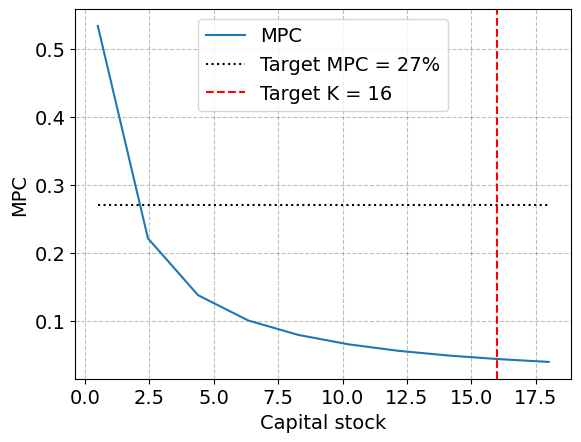

In [ ]:
plt.plot(K_vec, MPC_vec)
plt.plot(K_vec, np.ones_like(MPC_vec)*0.27, color = 'black', linestyle = ':')
# add vertical line
plt.axvline(16.0, color = 'red', linestyle = '--')
plt.xlabel('Capital stock')
plt.ylabel('MPC')
plt.legend(['MPC', 'Target MPC = 27%','Target K = 16'])
plt.savefig('figs/MPC_vs_K.pdf')
plt.show()

In [ ]:
def calib_obj(K,model):
    """ calibration objective """
    
    model.par.K_ss_target = K
    model.find_ss(method = 'beta', beta_min = 0.5, beta_max = 0.985, do_print=False)

    mean_MPC = (model.ss.D * calc_MPC(model.par,model.ss)).sum()
    print(mean_MPC)
    
    return mean_MPC-0.27

In [ ]:
from root_finding import brentq
model_calib = model.copy()
brentq(calib_obj,0.5,16.0,args=(model_calib,),do_print=True,varname='K',funcname='MPC-0.27',xtol=1e-8,rtol=1e-8);

0.5333307139161738
0.04429609040517329
0.0750915498309471
  0: K =   8.84629261 -> MPC-0.27 =  -0.19490845
0.13111254983213225
  1: K =   4.67314631 -> MPC-0.27 =  -0.13888745
0.21162920559604514
  2: K =   2.58657315 -> MPC-0.27 =  -0.05837079
0.31473875352865954
  3: K =   1.54328658 -> MPC-0.27 =   0.04473875
0.2599485378821232
  4: K =   1.99596377 -> MPC-0.27 =  -0.01005146
0.268568791006306
  5: K =   1.91291851 -> MPC-0.27 =  -0.00143121
0.2700100784788505
  6: K =   1.89955803 -> MPC-0.27 =   0.00001008
0.26999994698991403
  7: K =   1.89965145 -> MPC-0.27 =  -0.00000005
0.26999999999805474
  8: K =   1.89965096 -> MPC-0.27 =  -0.00000000
0.2700000015702504
  9: K =   1.89965095 -> MPC-0.27 =   0.00000000

K =   1.89965096 [MPC-0.27 =  -0.00000000]

0.26999999999805474


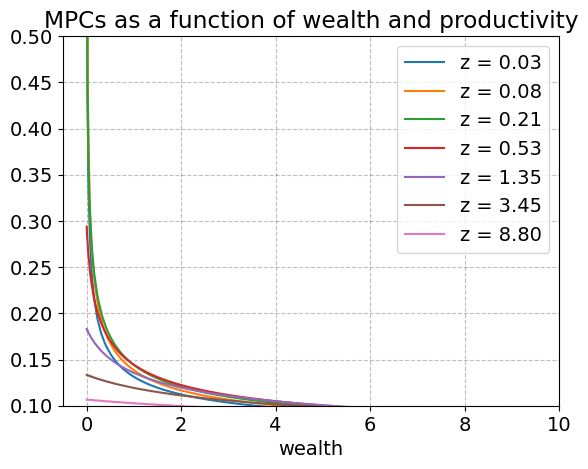

In [ ]:
MPC = calc_MPC(par,model_calib.ss)

plt.plot(par.a_grid, MPC[0].T)
plt.xlim(-0.5, 10)
plt.ylim(0.1, 0.5)
plt.legend([f'z = {z:.2f}' for z in par.z_grid])
plt.title('MPCs as a function of wealth and productivity')
plt.xlabel('wealth')
plt.savefig('figs/MPC_policies.pdf')
plt.show()

In [ ]:
print(f'ss.r = {model_calib.ss.r*100:.2f} %')
print(f'ss.K = {model_calib.ss.K:.2f}')
print(f'K/Y = {(model_calib.ss.K / model_calib.ss.Y):.2f}')

ss.r = 1.25 %
ss.K = 1.90
K/Y = 1.90
